In [260]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
games = pd.read_csv('vgsales.csv')

In [262]:
games.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [38]:
games.groupby('Genre').size()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64

##### This pie chart shows genre as part of a whole and the percentage of games in each genre.

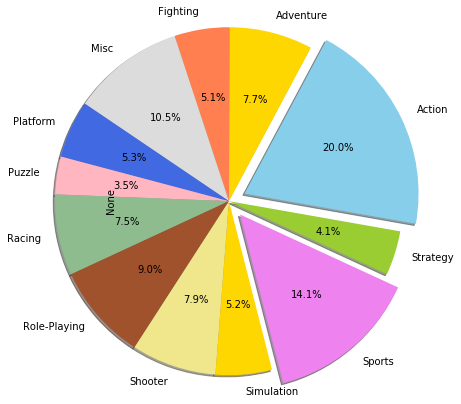

In [74]:
colors = ['skyblue', 'gold', 'coral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', 'yellowgreen']
games.groupby('Genre').size().plot.pie(autopct="%1.1f%%", colors=colors, explode=(0.2,0,0,0,0,0,0,0,0,0,0.2,0), radius=2, startangle=350, shadow=True)

##### It clearly shows that majority of games are in action and sports genre.

In [92]:
total_sales = games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
total_sales

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

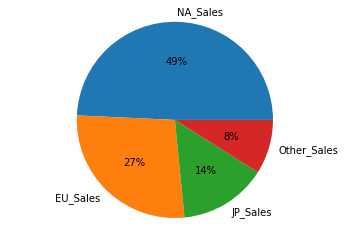

In [155]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.pie(total_sales, autopct='%d%%', labels=sales)
plt.axis('equal')
plt.show()

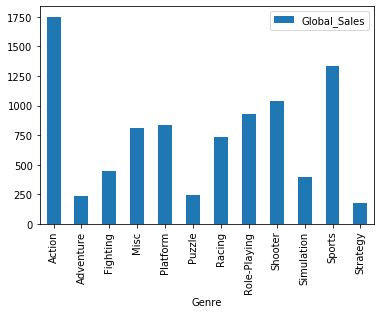

In [280]:
games.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', legend='Global Sales')

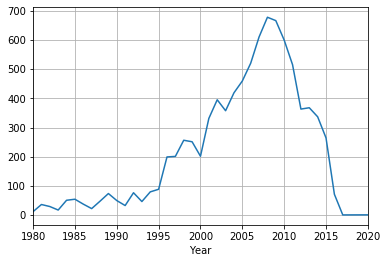

In [279]:
#Trends in sales globally. The peak of the sales was somewhere in 2008
games.groupby('Year')['Global_Sales'].sum().plot(kind='line', grid=True)

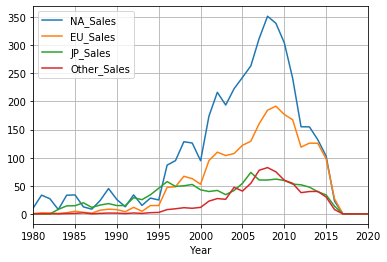

In [278]:
# Trends in sales in all four regions
games.groupby('Year')['NA_Sales'].sum().plot(kind='line', grid=True)
games.groupby('Year')['EU_Sales'].sum().plot(kind='line', grid=True)
games.groupby('Year')['JP_Sales'].sum().plot(kind='line', grid=True)
games.groupby('Year')['Other_Sales'].sum().plot(kind='line', grid=True)
plt.legend()


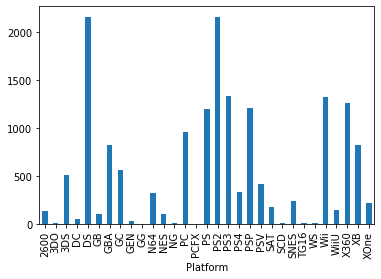

In [276]:
#This shows that most games were published in Nintendo DS and Sony PS2.
games.groupby("Platform").size().plot(kind="bar")

In [210]:
# games.groupby('Genre')['NA_Sales'].sum().plot(kind='line')
# games.groupby('Genre')['EU_Sales'].sum().plot(kind='line')
# games.groupby('Genre')['JP_Sales'].sum().plot(kind='line')
# games.groupby('Genre')['Other_Sales'].sum().plot(kind='line')

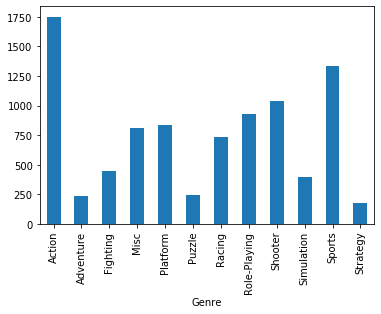

In [277]:
#This shows the global sales for each genre. Action is the highest.
games.groupby('Genre')['Global_Sales'].sum().plot(kind='bar')

In [238]:
genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role Playing',  'Shooter', 'Simulation',  'Sports', 'Strategy']

genre_NA = games.groupby('Genre')['NA_Sales'].sum().values
genre_EU = games.groupby('Genre')['EU_Sales'].sum().values
genre_JP = games.groupby('Genre')['JP_Sales'].sum().values
genre_Other = games.groupby('Genre')['Other_Sales'].sum().values

In [235]:
x = range(12)

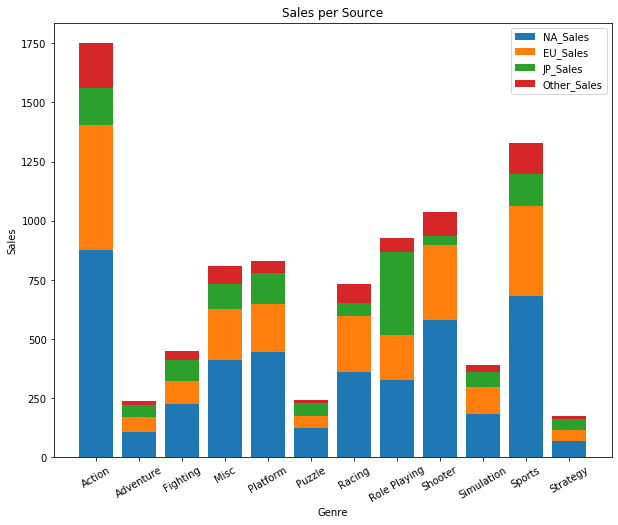

In [299]:
JP_bottom = np.add(genre_NA, genre_EU)
Other_bottom = np.add(JP_bottom, genre_JP)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
plt.bar(x, genre_NA)
plt.bar(x, genre_EU,bottom=genre_NA)
plt.bar(x, genre_JP, bottom=JP_bottom)
plt.bar(x, genre_Other,bottom=Other_bottom)


ax.set_xticks(range(len(genre)))
ax.set_xticklabels(genre, rotation=30)
plt.title('Sales per Source')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.legend(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.show()

##### Breakdown of all sales for each genre.

In [297]:
glob_sales = games.groupby('Genre')['Global_Sales'].sum().reset_index()
print(glob_sales)

           Genre  Global_Sales
0         Action       1751.18
1      Adventure        239.04
2       Fighting        448.91
3           Misc        809.96
4       Platform        831.37
5         Puzzle        244.95
6         Racing        732.04
7   Role-Playing        927.37
8        Shooter       1037.37
9     Simulation        392.20
10        Sports       1330.93
11      Strategy        175.12


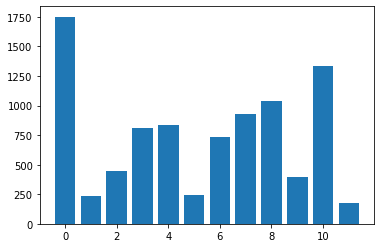

In [300]:
plt.bar(range(len(glob_sales.Genre)), glob_sales.Global_Sales)
plt.show()